## Classification of all the mice from the third day of the experiment

In this experiment only the data from the third day will be consider. The model is tested on a pool of 40 mice each coming from different breeds.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.append('../Library')

import breedManip as breedManip
import dataProcessing as dataProcessing
import breeds as breeds
import splitData as splitData

import importlib
importlib.reload(splitData)

2023-07-12 11:31:57.334810: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-12 11:31:57.422191: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-12 11:32:00.878258: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<module 'splitData' from '/mnt/remote/workspaces/magali.egger/TBproject/Travail_Bachelor/ClassificationSimple/../Library/splitData.py'>

#### Preparation of the train and test set
Only the mouse of breeds bigger than 3 are considered

In [3]:
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_simplify_day3.pkl', 'rb') as f:
    df = pickle.load(f)
df['breed'] = df['mouse'].apply(lambda x: breedManip.getBreedIndex(breedManip.getBreedOfMouse(x)))

In [4]:
df.columns

Index(['Unnamed: 0', 'rawState', 'state', 'EEGv', 'EMGv', 'epoch', 'day',
       'spectral_flatness', 'spectral_centroid', 'spectral_entropy',
       'spectral_rolloff_0.1', 'spectral_rolloff_0.2', 'spectral_rolloff_0.3',
       'spectral_rolloff_0.4', 'spectral_rolloff_0.5', 'spectral_rolloff_0.6',
       'spectral_rolloff_0.7', 'spectral_rolloff_0.8', 'spectral_rolloff_0.9',
       'EEGv_mean2', 'EMGv_mean2', 'EEGv_median2', 'EMGv_median2', 'EEGv_var2',
       'EMGv_var2', 'EEGv_min2', 'EMGv_min2', 'EEGv_max2', 'EMGv_max2',
       'EEGv_mean5', 'EMGv_mean5', 'EEGv_median5', 'EMGv_median5', 'EEGv_var5',
       'EMGv_var5', 'EEGv_min5', 'EMGv_min5', 'EEGv_max5', 'EMGv_max5',
       'EEGv_mean10', 'EMGv_mean10', 'EEGv_median10', 'EMGv_median10',
       'EEGv_var10', 'EMGv_var10', 'EEGv_min10', 'EMGv_min10', 'EEGv_max10',
       'EMGv_max10', 'EEGv_mean20', 'EMGv_mean20', 'EEGv_median20',
       'EMGv_median20', 'EEGv_var20', 'EMGv_var20', 'EEGv_min20', 'EMGv_min20',
       'EEGv_max20',

In [6]:
df["rawState"].unique()

array(['w', 'n', 'r'], dtype=object)

In [7]:
selected_breeds = breedManip.selectAllBreedsOfSizeNOrMore(4)
id_selected_breeds = [breedManip.getBreedIndex(breed) for breed in selected_breeds]

In [8]:
breeds = breedManip.selectAllBreedsOfSizeNOrMore(0)
unselected_breeds = [breed for breed in breeds if breed not in selected_breeds]
unselected_breeds

['bxd_079', 'bxd_085', 'bxd_101']

In [9]:
# keep only the selected breeds
df = df[df['breed'].isin(id_selected_breeds)]

In [10]:
df.head()

,Unnamed: 0,rawState,state,EEGv,EMGv,epoch,day,spectral_flatness,spectral_centroid,spectral_entropy,...,EMGv_max100,EEGv_log,EMGv_log,bias,EEGv^2,EEGv^3,EMGv^2,EMGv^3,mouse,breed
42018,43200,w,w,2.561793e-09,2.476193e-10,43200,2,0.156645,15.654199,-6.416485,...,6.798730e-10,-19.782559,-22.119129,1,6.562781e-18,1.681248e-26,6.131530e-20,1.518285e-29,09003,34
42019,43201,w,w,2.890715e-09,1.768662e-10,43201,2,0.146992,15.432471,-5.647920,...,6.798730e-10,-19.661762,-22.455627,1,8.356233e-18,2.415549e-26,3.128167e-20,5.532671e-30,09003,34
42020,43202,w,w,2.657057e-09,1.719997e-10,43202,2,0.096660,11.455600,-5.618493,...,6.798730e-10,-19.746047,-22.483528,1,7.059955e-18,1.875871e-26,2.958391e-20,5.088426e-30,09003,34
42021,43203,w,w,3.102465e-09,1.463278e-10,43203,2,0.085641,10.517584,-5.388146,...,6.798730e-10,-19.591069,-22.645172,1,9.625289e-18,2.986212e-26,2.141181e-20,3.133143e-30,09003,34
42022,43204,w,w,3.150835e-09,1.709445e-10,43204,2,0.098589,10.449326,-5.478330,...,6.798730e-10,-19.575598,-22.489682,1,9.927761e-18,3.128074e-26,2.922202e-20,4.995344e-30,09003,34


Split the dataset into train and test set

In [12]:
df_train, df_test = splitData.split_data_breeds(df, 30)

In [13]:
print(df_test['mouse'].unique())

['09003' '10301' '29T06' 'BDF06' '08404' '07006' '2D203' '51G10' '00503'
 '06405' '07303' '08911' '07106' '08112' '06306' '06109' '09701' '08311'
 '02903' '06504' 'DBF07' '09501' '05001' '08705' '04802' '05506' '03207'
 '06704' '06604' '09605' '10008' 'BL602' '07504' '04905' '05605' '04506'
 '09801' '04310' '04406']


In [14]:
print(df_train['mouse'].unique())

['043S5' '06403' '06110' '06404' '02901' '03205' '09509' '04309' '09806'
 '02910' '04508' '08108' '00506' '09803' '08106' '07007' 'DBA13' '04901'
 '1D204' '06603' '09708' '10009' 'DBF01' 'BL6V3' '04806' '08405' 'BL611'
 '08314' '05502' '07004' 'BL6V2' '10304' '05602' '09006' '10004' '06505'
 'BL606' '10306' '29T01' '09808' '09504' '10002' '05501' '05604' '02905'
 '03206' '07305' 'BDF04' '06105' 'DBA12' '04405' '07502' '29T10' '04403'
 '06408' 'DBF06' '10010' '08706' 'BDF02' '07105' '08707' '06707' '05002'
 '09807' 'BL601' '09702' '1D206' '04501' '04906' '06605' 'BL6V1' '09506'
 '04308' '05606' 'DBF04' '07501' '00505' '06705' '1D203' '09604' '02909'
 '04306' '06303' 'BL610' '06703' '03208' '08903' '09602' '051G9' '07505'
 '08102' '09505' '04402' '10003' '06308' '00504' '09005' '07302' '00501'
 '05004' '06601' '05101' 'BL609' '08904' '08401' 'DBA14' '05505' 'BL614'
 '05107' '09709' '06702' '09601' '07503' '04504' '04902' '02907' '04805'
 '06307' '09508' '07005' '05108' '06111' 'DBA11' 'D

Alternative: use the train and test set from the folder Data

In [3]:
# get the df_train and df_test with pickle
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_train.pkl', 'rb') as f:
    df_train = pickle.load(f)

with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_test.pkl', 'rb') as f:
    df_test = pickle.load(f)

In [6]:
len(df_train['mouse'].unique())

207

In [15]:
print(df_train['mouse'].unique())

['043S5' '06403' '06110' '06404' '02901' '03205' '09509' '04309' '09806'
 '02910' '04508' '08108' '00506' '09803' '08106' '07007' 'DBA13' '04901'
 '1D204' '06603' '09708' '10009' 'DBF01' 'BL6V3' '04806' '08405' 'BL611'
 '08314' '05502' '07004' 'BL6V2' '10304' '05602' '09006' '10004' '06505'
 'BL606' '10306' '29T01' '09808' '09504' '10002' '05501' '05604' '02905'
 '03206' '07305' 'BDF04' '06105' 'DBA12' '04405' '07502' '29T10' '04403'
 '06408' 'DBF06' '10010' '08706' 'BDF02' '07105' '08707' '06707' '05002'
 '09807' 'BL601' '09702' '1D206' '04501' '04906' '06605' 'BL6V1' '09506'
 '04308' '05606' 'DBF04' '07501' '00505' '06705' '1D203' '09604' '02909'
 '04306' '06303' 'BL610' '06703' '03208' '08903' '09602' '051G9' '07505'
 '08102' '09505' '04402' '10003' '06308' '00504' '09005' '07302' '00501'
 '05004' '06601' '05101' 'BL609' '08904' '08401' 'DBA14' '05505' 'BL614'
 '05107' '09709' '06702' '09601' '07503' '04504' '04902' '02907' '04805'
 '06307' '09508' '07005' '05108' '06111' 'DBA11' 'D

In [16]:
print(df_test['mouse'].unique())

['09003' '10301' '29T06' 'BDF06' '08404' '07006' '2D203' '51G10' '00503'
 '06405' '07303' '08911' '07106' '08112' '06306' '06109' '09701' '08311'
 '02903' '06504' 'DBF07' '09501' '05001' '08705' '04802' '05506' '03207'
 '06704' '06604' '09605' '10008' 'BL602' '07504' '04905' '05605' '04506'
 '09801' '04310' '04406']


In [5]:
df_train = df_train.drop(columns=['mouse'])
df_test = df_test.drop(columns=['mouse'])

df_train = df_train.drop(columns=['breed'])
df_test = df_test.drop(columns=['breed'])

In [6]:
x_train, x_test, y_train, y_test, le = splitData.encode_scale_data(df_train, df_test, 13, cat_matrix=True)

In [15]:
print(le.transform(['w', 'r','n']))
print(le.classes_)

[2 1 0]
['n' 'r' 'w']


#### Training of the model

Those weights come from the notebook : exploration_OneMouse and are based mouse 06705

- Ratio wake :  0.65
- Ratio NREM :  0.30
- Ratio REM :  0.05

In [11]:
"""
class_weights = [{0: 0.033, 1: 0.2, 2: 0.015},   
                 {0: 0.033, 1: 0.2, 2: 0.015},   
                 {0: 0.033, 1: 0.2, 2: 0.015}]
"""

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [21]:
rfc = RandomForestClassifier(random_state=13, class_weight="balanced", n_jobs=-1)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [23]:
# stock the rfc model with pickle
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/rfc_class_all.pkl', 'wb') as f:
    pickle.dump(rfc, f)

[[266800   1185   7875]
 [  8336  27776   2068]
 [ 15168   1172 430858]]


              precision    recall  f1-score   support

           n       0.92      0.97      0.94    275860
           r       0.92      0.73      0.81     38180
           w       0.98      0.96      0.97    447198

    accuracy                           0.95    761238
   macro avg       0.94      0.89      0.91    761238
weighted avg       0.95      0.95      0.95    761238



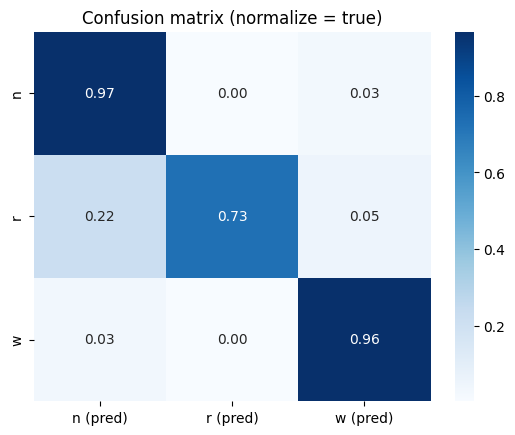

In [22]:

from sklearn.metrics import classification_report, confusion_matrix
pred = np.argmax(y_pred, axis=1)
test = np.argmax(y_test, axis=1)

# plot the confusion matrix between predictions of the model and real values

cm = np.array(confusion_matrix(test, pred))
print(cm)

cm = np.array(confusion_matrix(test, pred, normalize='true')) # normalize = 'true' or 'pred'
confusion = pd.DataFrame(cm, index=le.classes_, columns=le.classes_ + ' (pred)')

print(classification_report(test, pred, target_names=le.classes_, zero_division=0))

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='.2f')
plt.title(f'Confusion matrix (normalize = true)')
plt.show()